In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [15]:
marketing = pd.read_csv('marketing.csv', 
                        parse_dates=['date_subscribed', 'date_canceled'])
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True


In [16]:
marketing.describe()

C:\Users\user\AppData\Local\Temp\ipykernel_16064\948423620.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  marketing.describe()
C:\Users\user\AppData\Local\Temp\ipykernel_16064\948423620.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  marketing.describe()


,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,2018-01-16 00:00:00,2018-04-02 00:00:00,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,2018-01-05 00:00:00,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-31 00:00:00,2018-05-09 00:00:00,NaN,NaN


In [17]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  object        
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10022 non-null  object        
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          1856 non-null   object        
dtypes: datetime64[ns](2), object(10)
memory usage: 941.1+ KB


In [18]:
marketing['marketing_channel'].unique()

array(['House Ads', 'Push', 'Facebook', 'Instagram', 'Email', nan],
      dtype=object)

In [19]:
marketing['converted'] = marketing['converted'].astype('bool')

marketing['is_house_ad'] = np.where(
    marketing['marketing_channel'] == 'House Ads', True, False
)

In [20]:
channel_dic = {'House Ads': 1,  'Facebook':3, 'Instagram':2, 'Email':4, 'Push':5}
marketing['Channel_code'] = marketing['marketing_channel'].map(channel_dic)
marketing['Channel_code'].head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Channel_code, dtype: float64

In [21]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ad,Channel_code
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,1.0
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True,1.0
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True,1.0
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,True,1.0
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,True,1.0


In [22]:
marketing['date_served'] = pd.to_datetime(marketing['date_served'])
marketing['day_served'] = marketing['date_served'].dt.day_of_week
marketing['DoW'] = marketing['date_subscribed'].dt.day_of_week

In [23]:
marketing['language_displayed'].unique()

array(['English', 'German', 'Arabic', 'Spanish'], dtype=object)

In [24]:
marketing['is_correct_lang'] = np.where(marketing['language_displayed'] == marketing['language_preferred'], 'Yes', 'No')
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ad,Channel_code,day_served,DoW,is_correct_lang
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,1.0,0.0,0.0,Yes
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True,1.0,0.0,0.0,Yes
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True,1.0,0.0,0.0,Yes
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,True,1.0,0.0,0.0,Yes
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,True,1.0,0.0,0.0,Yes


### EDA

How many marketing users see marketing assets?

In [28]:
# Aggregate users that see ads by date
daily_users = marketing.groupby(['date_served'])['user_id'].nunique()
daily_users

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64

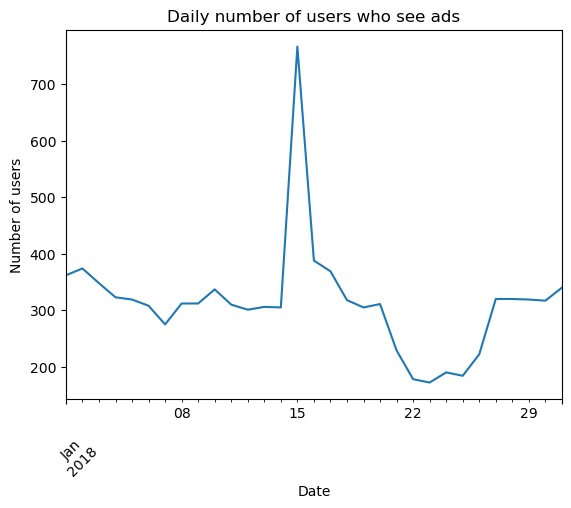

In [31]:
daily_users.plot()
plt.title('Daily number of users who see ads')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.xticks(rotation = 45)
plt.show()

Much like in daily users who view marketing assets, there's a large peak around the time when an email blast goes out.

## Common Marketing Metrics

Conversion Rate - Of all the people who came into contact with your marketing campaign, how many bought the product? (Prchase or Subscribed)

Retention Rate - Stay of a subscriber

In [36]:
# Calculating subscription rate
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

total = marketing['user_id'].nunique()

conv_rate = subscribers / total
print(round(conv_rate*100,2),'%')

14.09 %


In [37]:
# Calculating retention rate
retained = marketing[marketing['is_retained'] == True]['user_id'].nunique()
subscribers = marketing[marketing['converted'] == True]['user_id'].nunique()

retention = retained / subscribers
print(round(retention*100,2),'%')

65.83 %


### Customer Segmentation

Breaking down metrics by specific characteristic e.g Age, gender. location, past interactions , marketing channels used by users.

**By Marketing Channels**

In [38]:
house_ads = marketing[marketing['subscribing_channel'] == 'House Ads']

# Calculating retention rate
retained = house_ads[house_ads['is_retained'] == True]['user_id'].nunique()
subscribers = house_ads[house_ads['converted'] == True]['user_id'].nunique()

retention_rate = retained / subscribers
print(round(retention_rate*100,2),'%')

58.05 %


Compare retention rates across all channels to check whether some channels perform better than others

In [40]:
retained = marketing[marketing['is_retained'] == True].groupby(['subscribing_channel'])['user_id'].nunique()
retained

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64

In [41]:
subscribers = marketing[marketing['converted'] == True].groupby(['subscribing_channel'])['user_id'].nunique()
subscribers

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64

In [42]:
# Calculating retention rate across the dataframe

channel_retention_rate = (retained/subscribers)*100
channel_retention_rate

subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64

**Conversion Rate By Language**

In [47]:
english_speakers = marketing[marketing['language_displayed'] == 'English']
total = english_speakers['user_id'].nunique()

subscribers = english_speakers[english_speakers['converted'] == True]['user_id'].nunique()

conversion_rate = subscribers/total
print('English speaker conversion rate:', round(conversion_rate*100,2), '%')

English speaker conversion rate: 13.13 %


In [50]:
total = marketing.groupby(['language_displayed'])['user_id'].nunique()

subscribers = marketing[marketing['converted'] == True].groupby(['language_displayed'])['user_id'].nunique()

language_conversion_rate = subscribers/total
round(language_conversion_rate*100,2)


language_displayed
Arabic     50.00
English    13.13
German     71.62
Spanish    20.00
Name: user_id, dtype: float64

The conversion rate is much lower for English and Spanish.

**Aggregting By Date**

In [54]:
total = marketing.groupby(['date_served'])['user_id'].nunique()

subscribers = marketing[marketing['converted'] == True].groupby(['date_served'])['user_id'].nunique()

daily_conversion_rate = subscribers/total
round(daily_conversion_rate*100.2)

date_served
2018-01-01    10.0
2018-01-02    10.0
2018-01-03    10.0
2018-01-04    11.0
2018-01-05    13.0
2018-01-06    11.0
2018-01-07    14.0
2018-01-08    12.0
2018-01-09    13.0
2018-01-10    12.0
2018-01-11     8.0
2018-01-12     8.0
2018-01-13     9.0
2018-01-14     9.0
2018-01-15    11.0
2018-01-16    26.0
2018-01-17    22.0
2018-01-18     9.0
2018-01-19     6.0
2018-01-20     7.0
2018-01-21     9.0
2018-01-22    12.0
2018-01-23    12.0
2018-01-24    12.0
2018-01-25    13.0
2018-01-26     9.0
2018-01-27     7.0
2018-01-28     6.0
2018-01-29     6.0
2018-01-30     7.0
2018-01-31     5.0
Name: user_id, dtype: float64

### Plotting Campaign Results

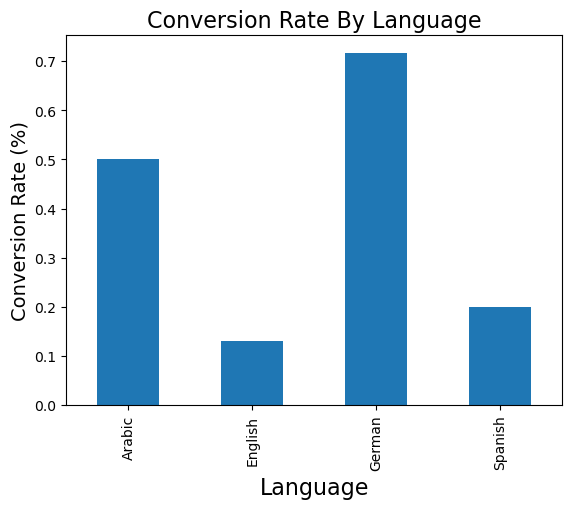

In [55]:
language_conversion_rate.plot(kind='bar')
plt.title('Conversion Rate By Language', size = 16)
plt.xlabel('Language', size = 16)
plt.ylabel('Conversion Rate (%)', size = 14)
# plt.xticks(rotation = 45)
plt.show()

### Calculating Subscriber Quality

In [57]:
total = marketing.groupby(['date_subscribed'])['user_id'].nunique()

retained = marketing[marketing['is_retained'] == True].groupby(['date_subscribed'])['user_id'].nunique()

daily_retention_rate = retained/total
round(daily_retention_rate*100.2)[0:5]

date_subscribed
2018-01-01    78.0
2018-01-02    70.0
2018-01-03    73.0
2018-01-04    50.0
2018-01-05    58.0
Name: user_id, dtype: float64

In [59]:
# Reset index to turn into dataframe

daily_retention_rate = pd.DataFrame(daily_conversion_rate.reset_index())

daily_retention_rate.columns = ['date_subscribed', 'retention_rate']

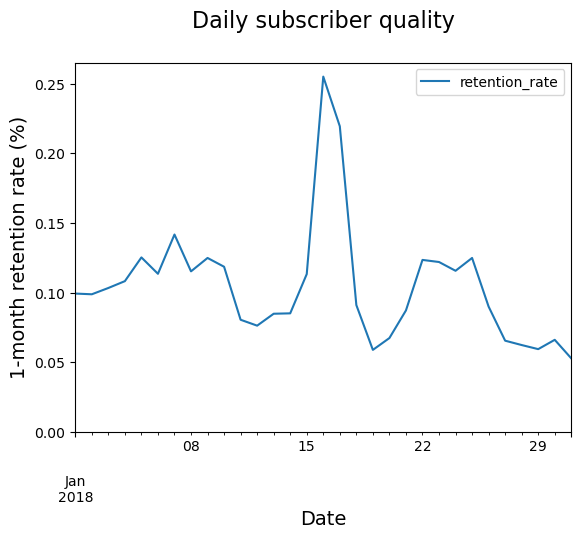

In [61]:
# Visualize trend over time
daily_retention_rate.plot('date_subscribed', 'retention_rate')

plt.title('Daily subscriber quality\n', size=16)
plt.xlabel('Date', size = 14)
plt.ylabel('1-month retention rate (%)', size =14)
plt.ylim(0)
plt.show()